<a href="https://colab.research.google.com/github/medeirosgian/Data-Science/blob/main/PROJETO_An%C3%A1lise_da_Seguran%C3%A7a_P%C3%BAblica_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Segurança Pública do Rio de Janeiro (1991 - 2020)

<center><img alt="Rio de Janeiro" width="60%" src="https://static.congressoemfoco.uol.com.br/2018/03/PM_RJ_T%C3%A2niaRego_Abr.jpg"></center>

A rotina do brasileiro é rodeada pela violência no país, não há um dia em que você ligue a televisão ou leia um jornal em que não há notícias de algumas morte violenta no país, e de fato o Brasil possui números que não trazem conforto para quem os lê, só no ano de 2019 o Brasil teve [41.635 casos de homicídio](https://www.poder360.com.br/brasil/numero-de-assassinatos-no-brasil-cai-19-em-2019-no-total-sao-41-635-mortes/#:~:text=Compartilhe-,N%C3%BAmero%20de%20assassinatos%20no%20Brasil%20cai%2019%25%20em%202019,no%20total%2C%20s%C3%A3o%2041.635%20mortes&text=O%20n%C3%BAmero%20de%20assassinatos%20no,2018%20%E2%80%93quase%2010.000%20a%20menos.), mesmo tendo uma queda de quase 20% em relação a 2018.

Atualmente, as leis de acesso a informação (como a Lei nº 12.527), proporcionam a disponibilização de várias fontes de dados, como os que serão analisados hoje.

Através do portal [ISP Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html), podemos obter acesso aos dados estatísticos da segurança pública do Rio de Janeiro. Com isso, podemos analisar o cenário desde 1991, explorando as variáveis disponíveis.


## Obtenção dos Dados

Os dados para essa análise foram adquiridos no portal [ISP Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html), que é uma página do Instituto de Segurança Pública do Rio de Janeiro.

Todos os dados disponíveis no portal são construídos a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

O arquivo que utilizaremos será `Estatísticas de segurança: série histórica mensal no estado desde 01/1991`, disponível no portal. O arquivo será anexado ao github para facilitar a importação, e pode ser obtido diretamente por [este link](https://raw.githubusercontent.com/medeirosgian/datasets/main/violencia_rio.csv).

### Importar os Dados

In [10]:
# importar a biblioteca pandas e os dados

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/medeirosgian/datasets/main/violencia_rio.csv', sep = ';')

## Análise inicial dos dados

Antes de partirmos para uma análise aprofundada dos dados, devemos sempre conhecer melhor os nossos dados, para isso, primeiro iremos verificar como os dados estão dispostos.

In [11]:
# verificar as primeiras entradas do DataFrame

df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3


In [12]:
# verificar as últimas entradas do DataFrame

df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
355,2020,8,261,2,12,275,51,326,354,4213,459,162,1702,3481,1252,659,5392,1791,415,243,42,2,5,4,74,15,1190,9173,1107,702,343,746,129,5755,8782,0,118,3,4592,2050,1009,917,172,1283,2915,343,1512,35,4102,275,29,4,0,2,50348,3
356,2020,9,239,3,7,249,54,303,343,4560,481,171,1675,3567,1319,582,5468,1742,323,294,61,0,4,2,57,27,1146,9124,1065,698,379,823,132,5888,8985,1,105,5,4086,1984,974,890,150,1173,2497,455,1059,37,4094,297,22,1,0,0,48732,3
357,2020,10,274,2,5,281,145,426,405,4602,452,168,1841,3971,1283,768,6022,1899,358,289,49,0,0,6,51,15,1239,9928,1058,813,431,1005,157,5864,9328,0,105,11,4593,2019,972,910,173,1212,2787,369,993,37,4194,297,24,4,2,0,50772,2
358,2020,11,324,2,8,334,80,414,400,4620,467,173,1780,3763,1301,707,5771,2083,331,273,71,1,2,7,64,12,1294,9909,1052,837,395,1017,148,5402,8851,1,107,7,3723,1738,803,820,147,1273,2629,381,642,37,4055,316,19,3,1,1,47940,2
359,2020,12,279,2,8,289,79,368,322,4672,424,186,1656,3544,1273,715,5532,2300,459,324,75,0,4,6,68,24,1368,10160,1111,807,318,1018,157,5508,8919,0,112,5,3541,1709,784,827,133,1190,2673,360,906,40,4116,308,20,0,1,1,47842,2


Como já sabemos como os dados estão dispostos, podemos verificar quantas entradas e variáveis temos disponíveis.

In [13]:
# verificar a quantidade de dados

print('Entradas: \t', df.shape[0])
print('Variáveis: \t', df.shape[1])

Entradas: 	 360
Variáveis: 	 56


Sabendo a dimensão dos dados e como eles se comportam no DataFrame, vamos verificar quais as variáveis que temos disponíveis.

In [14]:
# verificar as variáveis

df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

Agora que sabemos a disposição dos nossos dados através das variáveis, devemos verificar que tipo de dados temos em cada coluna.

Este tipo de informação auxilia no processo de limpeza dos dados, o que consequentemente facilita a análise.

In [15]:
# verificar o tipo de dados em cada coluna

df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
cvli                          object
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_transeunte               int64
roubo_celular                 object
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
t

Aqui podemos verificar que grande parte dos dados vieram com o tipo `object`, o que pode atrapalhar no plot de gráficos futuramente, porém como não iremos analisar a totalidade dos dados, iremos converter os dados somente quando necessário.

Quando demos uma olhada na disposição dos nossos dados, percebemos que há um número relevante de entradas vazias, por isso, é bom que verifiquemos a quantidade de dados faltantes.

In [16]:
# verificar a ausência de valores

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

fase                          0.0
registro_ocorrencias          0.0
roubo_bicicleta               0.0
roubo_apos_saque              0.0
roubo_conducao_saque          0.0
roubo_cx_eletronico           0.0
roubo_banco                   0.0
roubo_residencia              0.0
roubo_comercio                0.0
roubo_carga                   0.0
roubo_veiculo                 0.0
roubo_rua                     0.0
roubo_em_coletivo             0.0
roubo_celular                 0.0
roubo_transeunte              0.0
lesao_corp_culposa            0.0
hom_culposo                   0.0
estupro                       0.0
lesao_corp_dolosa             0.0
tentat_hom                    0.0
letalidade_violenta           0.0
hom_por_interv_policial       0.0
cvli                          0.0
latrocinio                    0.0
lesao_corp_morte              0.0
hom_doloso                    0.0
mes                           0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos

Aqui temos algo que não deveria acontecer, mesmo com dados ausentes no DataFrame, não há detecção de dados faltantes nos dados como um todo, isso se deve por alguns motivos.
- Os dados são registrados desde 1991, sendo assim, mesmo que não há dados presentes em algumas categorias não significa que nada ocorreu naquele intervalo de tempo.

- Como algumas entradas estão vazias, entende-se que não houve ocorrências naquele periodo, e como as entradas estão vazias e não como ´NaN´, a linguagem entende que não há falta de dados

As colunas que contém dados que iremos utilizar durante a análise serão convertidas para `integers` posteriormente, com a finalidade de aumentar a compatibilidade dos dados.

O DataFrame tem 360 entradas, indexadas por um id, porém, temos como dados o ano e mês, logo, podemos utilizar esses dados como ID's dos dados.

In [17]:
# concatenar ano + mês
df[['ano', 'mes']] = df[['ano', 'mes']].astype(int).astype(str)
df['data'] = df['ano'] + '-' + df['mes']

# converter data para datetype
df['data'] = pd.to_datetime(df['data'], format='%Y-%m')

# indexar a data
df.index = df.data


In [18]:
# excluir ano e mes
del df['ano']
del df['mes']
del df['data']
df.head()

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1991-02-01,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
1991-03-01,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
1991-04-01,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
1991-05-01,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3


Agora que temos a data referentes aos dados como nosso ID, podemos prosseguir e dar uma olhada melhor em como nossos dados estão distribuídos. Para isso podemos utilizar o comando `describe` que nos dará uma visão estatística dos dados.

In [19]:
# descrição dos dados

df.describe()

,hom_doloso,latrocinio,letalidade_violenta,tentat_hom,lesao_corp_dolosa,roubo_transeunte,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,fase
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.0000,360.000000,360.000000,360.000000
mean,495.527778,15.305556,570.900000,320.536111,5446.102778,3457.988889,667.066667,4821.316667,2443.10000,345.100000,447.952778,130.269444,9.005556,1221.491667,9514.000000,1649.347222,1497.922222,6001.736111,10413.722222,1101.9750,1758.530556,64.330556,2.991667
std,119.114721,6.009368,108.569278,125.526474,1509.451478,2424.800597,298.207740,3183.526604,781.46029,220.791955,122.579997,45.649106,10.474799,785.692736,4531.941333,312.228380,962.956398,1937.578605,3656.967292,645.3002,649.710164,34.887949,0.091032
min,239.000000,2.000000,297.000000,122.000000,2350.000000,688.000000,281.000000,1086.000000,1097.00000,59.000000,169.000000,38.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,2322.000000,4691.000000,80.0000,729.000000,0.000000,2.000000
25%,397.000000,11.000000,491.500000,202.000000,4055.750000,1068.500000,436.750000,1607.500000,1883.00000,212.000000,357.750000,98.750000,2.000000,821.500000,5297.750000,1413.750000,725.250000,4019.750000,6714.000000,732.7500,1255.500000,39.750000,3.000000
50%,500.000000,15.000000,583.000000,324.000000,5705.000000,3151.000000,597.500000,4515.000000,2316.00000,292.500000,426.000000,123.000000,4.000000,1167.000000,9304.500000,1620.000000,1064.000000,6551.500000,10411.500000,989.5000,1740.000000,58.000000,3.000000
75%,574.000000,19.000000,643.500000,399.250000,6555.250000,5411.500000,793.500000,6966.000000,2781.50000,414.250000,531.000000,150.000000,14.000000,1635.750000,11627.250000,1830.000000,2284.500000,7572.250000,13822.500000,1704.5000,2186.750000,85.000000,3.000000
max,831.000000,36.000000,848.000000,645.000000,9050.000000,9669.000000,1628.000000,13833.000000,5358.00000,1329.000000,914.000000,300.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,2543.0000,3695.000000,217.000000,3.000000


## Conversão dos Dados

Como dito anteriormente, iremos converter os dados que serão utilizados durante a análise para melhor compatibilidade posteriormente, para isso iremos utilizar o método `to_numeric` pela sua compatibilidade com séries do Panda.

In [20]:
# converter entradas

df['trafico_drogas'] = pd.to_numeric(df['trafico_drogas'], errors='coerce')
df['total_furtos'] = pd.to_numeric(df['total_furtos'], errors='coerce')
df['total_roubos'] = pd.to_numeric(df['total_roubos'], errors='coerce')
df['hom_culposo'] = pd.to_numeric(df['hom_culposo'], errors='coerce')
df['hom_doloso'] = pd.to_numeric(df['hom_doloso'], errors='coerce')
df['hom_por_interv_policial'] = pd.to_numeric(df['hom_por_interv_policial'], errors='coerce')
df['pol_civis_mortos_serv'] = pd.to_numeric(df['pol_civis_mortos_serv'], errors='coerce')
df['pol_militares_mortos_serv'] = pd.to_numeric(df['pol_militares_mortos_serv'], errors='coerce')
df.head()

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,657,,15,,NaN,672,162,3051,,NaN,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,NaN,,872,,,,,,,217,,NaN,NaN,,3
1991-02-01,732,,17,,NaN,749,175,3421,,NaN,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,NaN,,751,,,,,,,209,,NaN,NaN,,3
1991-03-01,713,,25,,NaN,738,216,3613,,NaN,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,NaN,,789,,,,,,,188,,NaN,NaN,,3
1991-04-01,634,,20,,NaN,654,200,3211,,NaN,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,NaN,,787,,,,,,,140,,NaN,NaN,,3
1991-05-01,650,,20,,NaN,670,146,3051,,NaN,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,NaN,,845,,,,,,,78,,NaN,NaN,,3


In [21]:
df.dtypes

hom_doloso                      int64
lesao_corp_morte               object
latrocinio                      int64
cvli                           object
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                        object
hom_culposo                   float64
lesao_corp_culposa             object
roubo_transeunte                int64
roubo_celular                  object
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico            object
roubo_conducao_saque           object
roubo_apos_saque               object
roubo_bicicleta                object
outros_roubos                   int64
total_roubos                    int64
furto_veicul

## Quais crimes são mais praticados no Rio de Janeiro?

De acordo com o site [LFG](https://www.lfg.com.br/conteudos/artigos/geral/crimes-mais-praticados-no-brasil-que-lotam-as-penitenciarias), os crimes relacionados ao tráfico de drogas chegam a representar 28% da nossa população carcerária, os crimes de furto e roubo representam 37% das ocorrências (não necessariamente levam a prisão) e os crimes de homicídio representam 11% dos presos brasileiros.

Vale ressaltar que no ano de 2020, segundo o [Conselho Nacional de Justiça (CNJ)](https://atarde.uol.com.br/brasil/noticias/2126520-populacao-carceraria-no-brasil-aumenta-e-numero-chega-a-860-mil) o Brasil possuia uma população carcerária de 860 mil pessoas.

Tendo conhecimento dessas informações, iremos analisar esses três principais crimes, que juntos representam mais de 30% da população carcerária brasileira.

### Tráfico de drogas

O tráfico de drogas é um problema presente não somente no Brasil, mas no mundo inteiro, independente do quão liberal um país seja, o problema com o tráfico de drogas é presente em 100% dos países do mundo.

Como temos disponíveis os dados referentes ao tráfico de drogas, podemos observar a média de pessoas detidas pelo crime nos últimos 30 anos. Vale a pena ressaltar que a posse de drogas não necessáriamente configura crime de tráfico.

In [22]:
# media de crimes - tráfico de drogas

trafico_mean = df.trafico_drogas.mean()
print(trafico_mean)

770.2277777777778


Podemos observar que nos últimos 30 anos, tivemos em média 770 ocorrências de tráfico de drogas, são mais de 25 ocorrências por dia.

### Furto e Roubo

Outro problema recorrente no Brasil, os crimes de furto e roubo são comuns principalmente em grandes centros urbanos.

Temos disponíveis os dados de furto e roubo separadamente, porém iremos calcular a média deles juntos por se tratarem de crimes muito parecidos.

In [23]:
# media de crimes - furto e roubo
furto_roubo_mean = df.total_furtos.mean() + df.total_roubos.mean()
print(round(furto_roubo_mean))


19928


Chegamos ao número de mais de 19 mil furtos e roubos por mês, nos últimos 30 anos no Rio de Janeiro. Em média, são mais de 600 furtos e roubos por dia.

### Homicídios

Os crimes de homicídios são colocados em 3 categorias:
 - Homicídio Culposo: Quando há a intenção de matar.
 - Homicídio Doloso: - Quando não há a intenção de matar.
 - Homicídio por Intervenção Policial: Quando por algum motivo, o policial realiza alguma intervenção.

In [310]:
# media de crimes - homicídio

homicidio_mean = df.hom_culposo.mean() + df.hom_doloso.mean() + df.hom_por_interv_policial.mean()
print(round(homicidio_mean))

779


O Rio de Janeiro é lembrado por boa parte dos brasileiro pela sua violência, e os números reforçam isso, são em média quase 26 pessoas mortas por dia no estado nos últimos 30 anos.

Vale ressaltar novamente que os dados são referentes ao estado do Rio de Janeiro e não a cidade.

### Histogramas

Para termos uma visão ampla, iremos utilizar os histogramas para melhor visualização dos dados.

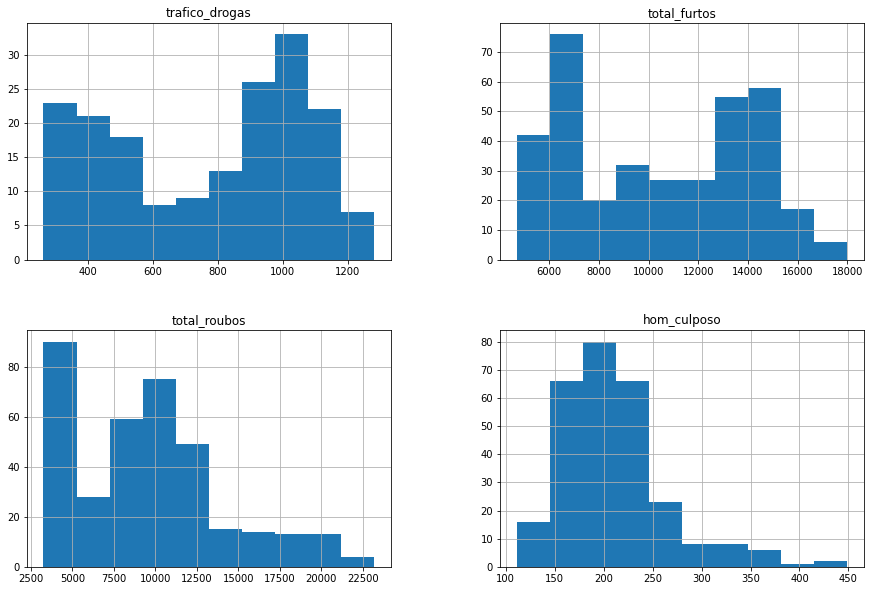

In [24]:
# plotar histograma

df[['trafico_drogas', 'total_furtos', 'total_roubos', 'hom_culposo']] = df[['trafico_drogas', 'total_furtos', 'total_roubos', 'hom_culposo']].apply(pd.to_numeric)

df[['trafico_drogas', 'total_furtos', 'total_roubos', 'hom_culposo']].hist(figsize = ((15, 10)));

No gráfico, alguns dados chamam a atenção:
- Houveram mais de 30 meses onde houve mais de 1000 ocorrências por tráfico de drogas.
- Tivemos quase 60 meses onde ouve pouco menos de 14mil ocorrências por furtos (de todos os tipos).
- Houve mais de 70 meses em que ocorreram 150-200 mortes por homicídio culposo.

## Quantos policiais morrem no Rio de Janeiro?

O Rio de Janeiro de acordo com a [própria PM do Rio](https://https://recordtv.r7.com/balanco-geral-rj/videos/segundo-a-pm-e-mais-perigoso-ser-policial-no-rio-do-que-em-qualquer-parte-do-mundo-18022020), é o lugar mais perigoso para se ser um policial no mundo.

Como temos os dados referentes ao número de policiais civis e militares mortos no estado do Rio de Janeiro, podemos verificar esses números.

In [312]:
# meses com maior número de mortes de policiais civis
df['pol_civis_mortos_serv'].sort_values(ascending=False).head(10)

data
2010-01-01    3.0
2011-12-01    2.0
2017-09-01    2.0
2005-05-01    2.0
2005-09-01    2.0
2005-12-01    2.0
2007-08-01    2.0
2007-09-01    2.0
2007-10-01    2.0
2007-11-01    2.0
Name: pol_civis_mortos_serv, dtype: float64

In [313]:
# media de policiais civis mortos por mes
pol_civis_mean = df['pol_civis_mortos_serv'].mean()
print(pol_civis_mean)

0.33796296296296297


In [314]:
# meses com maior número de mortes de policiais militares

df['pol_militares_mortos_serv'].sort_values(ascending=False).head(10)

data
2004-10-01    10.0
2016-11-01     7.0
2004-07-01     7.0
2003-03-01     7.0
2017-04-01     7.0
2004-12-01     7.0
2016-08-01     7.0
2004-05-01     6.0
2004-02-01     6.0
2007-03-01     6.0
Name: pol_militares_mortos_serv, dtype: float64

In [315]:
# media de policiais militares mortos por mes

pol_militares_mean = df['pol_militares_mortos_serv'].mean()
print(pol_militares_mean)

2.0324074074074074


Com esses dados podemos observar que os policiais militares estão expostos a uma maior chance de serem mortos enquanto exercem o seu trabalho.

## Conclusões

<center><img alt="Rio de Janeiro" width="60%" src="https://conteudo.imguol.com.br/c/noticias/42/2017/10/06/22set2017---tiroteio-na-rocinha-favela-da-zona-sul-do-rio-de-janeiro-1507328842696_615x300.jpg"></center>

A violência no Rio de Janeiro assusta até quem já se acostumou a ver o noticiario sempre reforçando o fato, e não é de se estranhar, só no ano de 2019 o número de homicídios no estado do Rio de Janeiro é quase 4 vezes maior que o número de mortos na [Guerra da Síria](https://exame.com/mundo\siria-termina-ano-com-o-menor-numero-de-mortes-e-derrota-do-ei/) no mesmo período.

A notícia boa é que o Rio de Janeiro não é um caso perdido, pelo menos de acordo com [esta matéria](https://brasil.elpais.com/brasil/2018/08/17/opinion/1534460373_936822.html), mas vamos análisar as conclusões que os dados apresentados nos trazem:

- Temos uma média de quase 779 homicídios por mês no estado do Rio nos últimos 30 anos.

- Temos uma média de 600 furtos e roubos por dia no estado.

- Uma média de 25 ocorrências por tráfico de drogas por dia.

Esses 3 crimes juntos representam mais de 30% da população carcerária brasileira, população esta que em 2020 era de 860 mil pessoas.

Quanto aos agentes de segurança no estado, podemos chegar a conclusão de que:

- Em média, morrem 1 policial civil a cada 3 meses e 2 policiais militares por mês.

- Em 2018, [morreram 92 policiais militares](https://extra.globo.com/casos-de-policia/numero-de-pms-mortos-no-rio-em-2018-o-menor-em-24-anos-23335383.html) no estado do Rio de Janeiro, este valor é próximo aos 94 agentes mortos nos EUA no mesmo período de acordo com o [FBI](https://www.fbi.gov/news/stories/2018-leoka-report-released-050619?__cf_chl_jschl_tk__=33d5ca524027563ad1e6f63d9a28b1feab69da7c-1612785171-0-AfBDhkojmLPX7Qv8ODIJ8s_qZqaMSDhXtqVC8qXc_qvm30pKsaudDOFc4w9JZg-9ezPhW2ELFUZV_0zpJHMo93NvdAQpiVDprU2xi_56kEdoUIzbQ9bmEAWEsuu02dPKWoLaoJ1_zP1Yo5V_xb4f6Hpk4irSI1flcE-A1I8-wTZ9LRBeEKHw7921aqwRl2xx03EJF8bVoXFkcHAHAF642TEVdaERFi1hbWY8Z0JLP8JkZ0W8GYHHzabD1yvuyxbpamuDMSX9LSyYAg5mXX9nUe3ZlCUj1XwjWK_gqpFW17FwLwNAoxoolM_Abs7AtQl7wJq6J2Uz5NkryVhFnr_eZ-C2bjoi_xjXLuwci42Og6NnBTuumsuw0wHXCC8HQkF-VYdRNeCbJicpgVcHs2FmoMgv_XOaUIzqZi_-0hxvsQs1x7J_NiWU6kIlFAQD8_3kcA).

Esta análise tem por finalidade analisar dados retirados diretamente de sua fonte (neste caso o Instituto de Segurança Pública do Rio de Janeiro), diferenciando-se de dados de competições ou de cursos que muitas vezes já vem trabalhados.

Caso haja dúvidas, entre em contato comigo:

[LinkedIn](https://bit.ly/gianMedeirosLinkedIn)

[Portifólio](https://github.com/medeirosgian/Data-Science)


